In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
mpl.rcParams['axes.unicode_minus'] = False

#4.1 선형회귀

##4.1.1 정규방정식

In [3]:
import numpy as np

X = 2*np.random.rand(100,1) # [0, 1) 범위의 [100,1] 2D array
y = 4+3*X+np.random.randn(100,1)

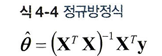

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best # 4와 3을 기대

array([[3.73961144],
       [3.225548  ]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # 모든 샘픙에 x0 = 1을 추가합니다.

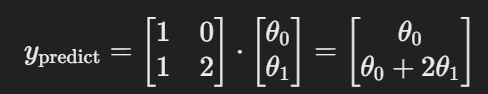

In [7]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.73961144],
       [10.19070744]])

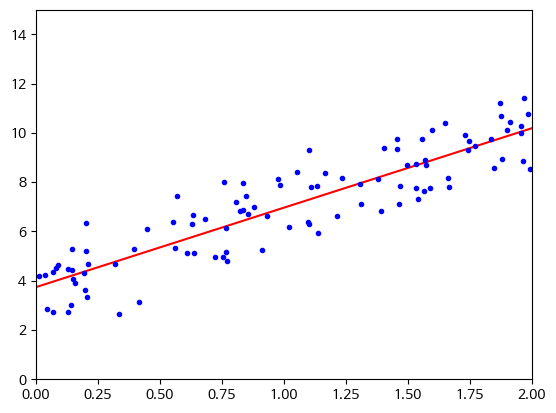

In [8]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic')

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

plt.show()

사이킷런에서 선형 회귀를 수행하는 방법

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.73961144]), array([[3.225548]]))

In [10]:
lin_reg.predict(X_new)

array([[ 3.73961144],
       [10.19070744]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[3.73961144],
       [3.225548  ]])

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[3.73961144],
       [3.225548  ]])

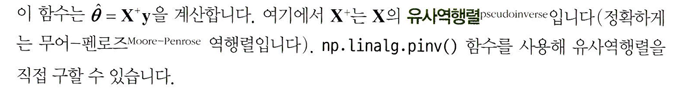

# 4.2 경사 하강법

- 짙은 안개로 산속에서 길을 잃은 상황에서 빨리 골짜기로 내려가는 좋은 방법은 가장 가파른 길을 따라 아래로 내려가는 것임
- 파라미터 벡터 theta에 대해 비용함수의 현재 gradient를 계산하고 gradient가 감소하는 방향으로 진행한다. gradient가 0이 되면 최솟값에 도달한 것임! **gradient=기울기**



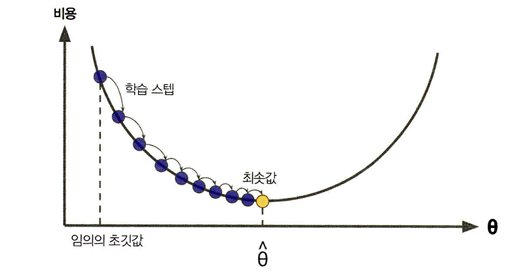

- 중요한 파라미터는 스텝의 크기로, 학습률(learning rate)하이퍼파라미터로 결정된다. 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸린다.반면 학습률이 너무 크면 골짜기를 가로질러 반대편으로 건너뛰게 되어 이전보다 더 높은 곳으로 올라가게 될지도 모름

- 경사 하강법의 문제점은 모든 비용함수가 매끈한 그롯과 같지는 않다. 특이한 지형이 있으면 최솟값으로 수렴하기 매우 어렵. 따라서 전역 최솟값보다 덜 좋은 지역 최솟값에 수렴하거나 일찍 멈추어 전역 최솟값에 도달하지 못하는 문제점이 생긴다.

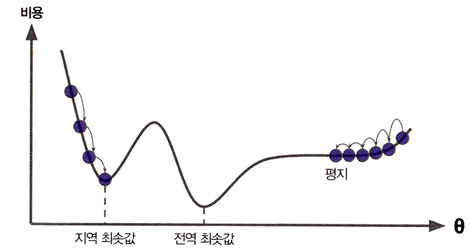

- 다행히 선형 회귀를 통한 MSE비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록함수이다. 이 사실은 경사 하강법이 전역 최솟값에 가깝게 접근할수 있다는 것을 보장한다.

##4.2.1 배치 경사 하강법

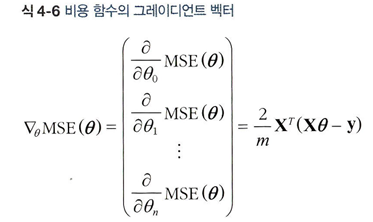

In [13]:
import numpy as np

eta = 0.1 # 학습률
n_iterations = 1000
m = 100

np.random.seed(42)
theta = np.random.randn(2, 1) # 무작위 초기화

for iteration in range(n_iterations) :
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [14]:
theta

array([[3.73961144],
       [3.225548  ]])

##4.2.2 확률적 경사 하강법

- 배치 경사 하강법은 매 스텝에서 전체 훈련 세트를 사용해 gradient를 계산하므로 훈련 세트가 커지면 매우 느려짐. 반대로 확률적 경사 하강법은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 gradient를 계산하므로 빠르다.
- 하지만 확률적이기 때문에 배치 경사 하강법보다 훨씬 불안정하고, 비용함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래로 요동치면서 평균적으로 감소
- **비용 함수가 매우 불규칙할 경우** 알고리즘이 지역 최솟값을 건너뛸 수 있도록 도와주므로 확률적 경사 하강법이 배치 경사 하강법보다 전역 최솟값을 찾을 가능성이 높다.
- **학습률을 크게 시작했다가 점차 작게 줄여**서 지역 최솟값에서 탈출시키지만 전역 최솟값에 다다르지 못하게 한다는 딜레마를 해소한다.

In [15]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t) : # 학습률을 점진적으로 줄이기 위함
  return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1) # 무작위 초기화

for epoch in range(n_epochs) : # 전체 데이터셋을 n_epochs번 반복 학습
  for i in range(m) :  # 한 에포크에서 m개의 샘플을 모두 사용
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi =   y[random_index : random_index + 1]

    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

일반적으로 한 반복(에포크)에서 m번 되풀이된다. 즉 하나의 샘플에 대한 gradient를 계산.

배치 경사 하강법 코드가 전체 훈련 세트에 대해 1000번 반복하는 동안 이 코드는 훈련 세트에서 50번만 반복하고도 매우 좋은 값에 도달함

In [16]:
theta

array([[3.69701907],
       [3.20636911]])

In [17]:
# 사이킷런에서 SGD(확률적 경사 하강법) 방식으로 회귀 사용

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 100, tol = 1e-3, penalty = None, eta0 = 0.1, random_state = 42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=100, penalty=None, random_state=42)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.74073054]), array([3.23414814]))

# 4.3 다항 회귀

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
np.random.seed(42) # 매 실행마다 동일한 난수 생성하도록 고정

In [21]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1) # 2차방정식으로 비선형 데이터

In [22]:
# 훈련 데이터 변환 - 훈련 세트에 있는 각 특성을 제곱하여 새로운 특정으로 추가

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False) # include_bias의 기본값은 True이 편향을 위한 특성인 1이 추가
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [23]:
X_poly[0] # X_poly는 이제 원래 특성 X와 이 특성의 제곱을 포함

array([-0.75275929,  0.56664654])

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

# 4.4 학습 곡선

- 고차 다항 회귀를 적용하면 보통의 선형 회귀보다 훨씬 더 훈련 데이터에 잘 맞추려 할 것이다. 선형이나 2차보다 300차의 예시를 보면 안다.
- 하지만 이 고차 다항 회귀 모델은 심각하게 훈련 데이터에 과대적합되었고, 선형 모델은 과소적합되었다.
- 얼마나 복잡한 모델을 사용할지 어떻게 결정하며, 어떻게 모델이 과대적합 또는 과소적합되었는지 알 수 있을까?

**학습 곡선**을 살펴보는 것이다.

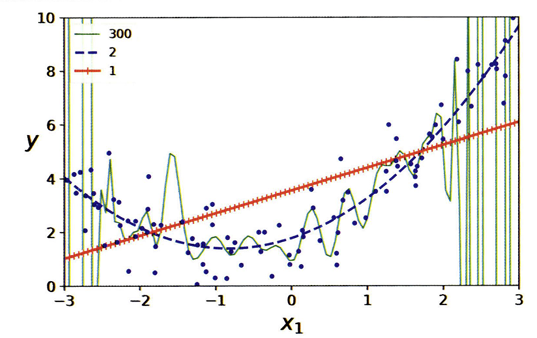

In [25]:
# 이 코드는 주어진 훈련 데이터에서 모델의 학습 곡선을 그리는 함수를 정의한다

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y) :
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 10)
  train_errors, val_errors = [], []

  for m in range(1, len(X_train)) :
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict (X_train[:m])
    y_val_predict = model.predict(X_val)

    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "훈련 세트")
  plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "검증 세트")

  plt.legend(loc = "upper right", fontsize = 14) # 라벨 추가

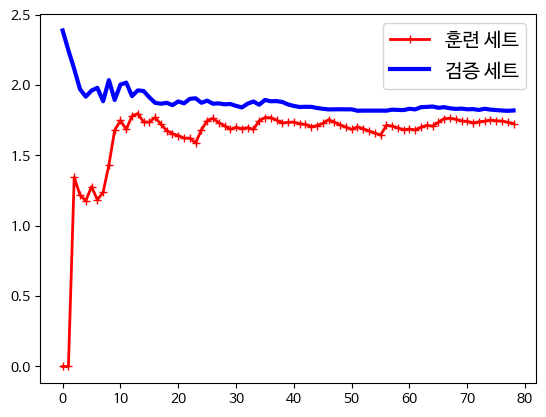

In [26]:
# 단순 선형 회귀 모델의 학습 곡선 살펴보기 - 평균 오차가 어느시점부터 계속 상승하다가 거의 변화 x

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

이 학습 곡선은 과소적합 모델의 전형적인 모습임. 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해있다.

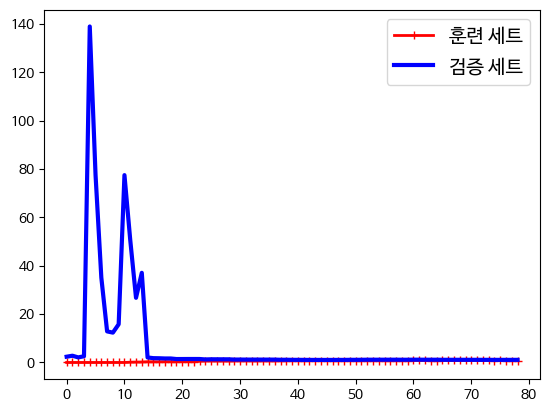

In [27]:
# 같은 데이터에서 10차 다항 회귀의 학습 곡선을 그려보자
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                                  ("poly_features", PolynomialFeatures(degree = 10, include_bias = False))
                                , ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

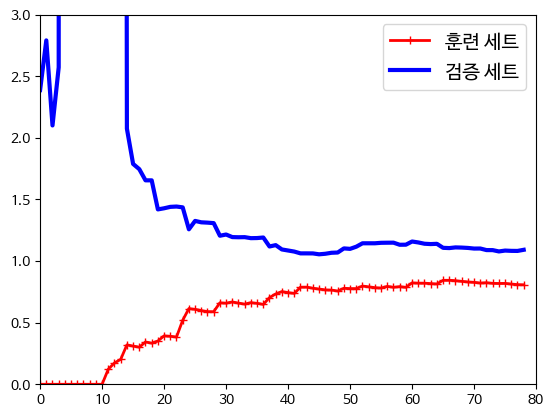

In [28]:
# 책에 없지만 그래프 정상 출력을 위한 코드 추가(그림 4-16, p183)
plot_learning_curves(polynomial_regression, X, y)

plt.axis([0, 80, 0, 3])
plt.show()

이 학습 곡선은 이전 곡선과의 두 가지 중요한 차이가 있다
- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.
- 두 곡선 사이에 공간이 있다. 이 말은 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고, 과대적합 모델의 특징이다. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워진다.